In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import random
import numpy as np
from scipy.sparse import csr_matrix
import pandas as pd
import json

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.cm as cm
from matplotlib import rcParams
from prettytable import PrettyTable

import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem.isri import ISRIStemmer
from collections import Counter 
import itertools
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

from joblib import dump, load

[nltk_data] Downloading package stopwords to C:\Users\lolom.DESKTOP-
[nltk_data]     IG3B3ER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("books.csv")

df

,موقع الكتاب,اسم الكتاب,مولف الكتاب,قسم الكتاب,Code,اللغه,عدد صفحات الكتاب,دار النشر,حجم الكتاب,صيغه الكتاب
0,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز المنزل رقم 98,محمود سالم,روايات بوليسية,3,عربي,48 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
1,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الموسيقار الصغير,محمود سالم,روايات بوليسية,3,عربي,54 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
2,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الوثائق السرية,محمود سالم,روايات بوليسية,3,عربي,50 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
3,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب التضحية عند الحيوان,هارون يحيى,كتب الأدب العربي متنوعة,6,عربي,160 صفحة,عدنان أوكطار,5 ميغابايت,pdf
4,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب معجزة الذرة,هارون يحيى,كتب تطوير الذات متنوعة,10,عربي,136 صفحة,عدنان أوكطار,3.41 ميغابايت,pdf
...,...,...,...,...,...,...,...,...,...,...
3962,https://www.arab-books.com/books/%d8%b1%d9%88%...,رواية قصة لا تنتهي,NaN,NaN,3,العربية,122 صفحة,العربية الحديثة,4.5 ميغابايت,PDF
3963,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب صلاة أهل الأعذار,NaN,NaN,1,العربية,7 صفحة,العثيمين الخيرية,بايت ميغابايت,PDF
3964,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب أذكار الصباح والمساء,NaN,NaN,1,العربية,33 صفحة,النشر: العقيدة,1.05 ميغابايت,PDF
3965,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب يوميات نص الليل PDF لمصطفى مح,NaN,NaN,3,العربية,57 صفحة,النشر: المعارف,5 ميغابايت,PDF


In [3]:
print(np.sum(df.isnull().any(axis=1)))

clean_df = df.dropna()
print(np.sum(clean_df.isnull().any(axis=1)))

139
0


In [4]:
print (df.notnull().any(axis = 0))


موقع الكتاب         True
اسم الكتاب          True
مولف الكتاب         True
قسم الكتاب          True
Code                True
اللغه               True
عدد صفحات الكتاب    True
دار النشر           True
حجم الكتاب          True
صيغه الكتاب         True
dtype: bool


In [5]:
def remove_hashtag(df, col = 'قسم الكتاب'):
    for letter in r'#.][!XR':
        df[col] = df[col].astype(str).str.replace(letter,'', regex=True)
    

        
remove_hashtag(clean_df)
clean_df

,موقع الكتاب,اسم الكتاب,مولف الكتاب,قسم الكتاب,Code,اللغه,عدد صفحات الكتاب,دار النشر,حجم الكتاب,صيغه الكتاب
0,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز المنزل رقم 98,محمود سالم,روايات بوليسية,3,عربي,48 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
1,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الموسيقار الصغير,محمود سالم,روايات بوليسية,3,عربي,54 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
2,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الوثائق السرية,محمود سالم,روايات بوليسية,3,عربي,50 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
3,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب التضحية عند الحيوان,هارون يحيى,كتب الأدب العربي متنوعة,6,عربي,160 صفحة,عدنان أوكطار,5 ميغابايت,pdf
4,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب معجزة الذرة,هارون يحيى,كتب تطوير الذات متنوعة,10,عربي,136 صفحة,عدنان أوكطار,3.41 ميغابايت,pdf
...,...,...,...,...,...,...,...,...,...,...
3823,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء التاسع,خالد توفيق,القرآن الكريم,1,عربي,71 صفحة,دار النشر:,8 ميغابايت,pdf
3824,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء العاشر,محمد بن صالح العثيمين,القرآن الكريم,1,عربي,71 صفحة,دار النشر:,8 ميغابايت,pdf
3825,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء الثامن,محمد بن صالح العثيمين,القرآن الكريم,1,عربي,70 صفحة,دار النشر:,8 ميغابايت,pdf
3826,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء السابع,مصطفى محمود,كتب روايات عربية,3,عربي,72 صفحة,دار النشر:,8 ميغابايت,pdf


In [6]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [7]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [8]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [9]:
def processDocument(doc, stemmer): 

    #Replace @username with empty string
    doc = re.sub(r'@[^\s]+', ' ', doc)
    doc = re.sub(r'_', ' ', doc)
    doc = re.sub(r'\n', ' ', doc)
    doc = re.sub(r'[a-z,A-Z]', '', doc)
    doc = re.sub(r'\d', '', doc)
    #Convert www.* or https?://* to " "
    doc = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',doc)
    #Replace #word with word
    doc = re.sub(r'#([^\s]+)', r'\1', doc)
    # remove punctuations
    doc= remove_punctuations(doc)
    # normalize the tweet
    doc= normalize_arabic(doc)
    # remove repeated letters
    doc=remove_repeating_char(doc)
    #stemming
    doc = stemmer.stem(doc)
    
    return doc

stemmer = ISRIStemmer()
clean_df["قسم الكتاب"] = clean_df['قسم الكتاب'].apply(lambda x: processDocument(x, stemmer))
clean_df

,موقع الكتاب,اسم الكتاب,مولف الكتاب,قسم الكتاب,Code,اللغه,عدد صفحات الكتاب,دار النشر,حجم الكتاب,صيغه الكتاب
0,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز المنزل رقم 98,محمود سالم,روايات بوليسيه,3,عربي,48 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
1,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الموسيقار الصغير,محمود سالم,روايات بوليسيه,3,عربي,54 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
2,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الوثائق السرية,محمود سالم,روايات بوليسيه,3,عربي,50 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
3,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب التضحية عند الحيوان,هارون يحيى,كتب الادب العربي متنوعه,6,عربي,160 صفحة,عدنان أوكطار,5 ميغابايت,pdf
4,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب معجزة الذرة,هارون يحيى,كتب تطوير الذات متنوعه,10,عربي,136 صفحة,عدنان أوكطار,3.41 ميغابايت,pdf
...,...,...,...,...,...,...,...,...,...,...
3823,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء التاسع,خالد توفيق,قران الكريم,1,عربي,71 صفحة,دار النشر:,8 ميغابايت,pdf
3824,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء العاشر,محمد بن صالح العثيمين,قران الكريم,1,عربي,71 صفحة,دار النشر:,8 ميغابايت,pdf
3825,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء الثامن,محمد بن صالح العثيمين,قران الكريم,1,عربي,70 صفحة,دار النشر:,8 ميغابايت,pdf
3826,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء السابع,مصطفى محمود,كتب روايات عربيه,3,عربي,72 صفحة,دار النشر:,8 ميغابايت,pdf


In [10]:
tokenizer = RegexpTokenizer(r'\w+')
clean_df["قسم الكتاب"] = clean_df["قسم الكتاب"].apply(tokenizer.tokenize)
# print(clean_df['text'].values[0])
clean_df

,موقع الكتاب,اسم الكتاب,مولف الكتاب,قسم الكتاب,Code,اللغه,عدد صفحات الكتاب,دار النشر,حجم الكتاب,صيغه الكتاب
0,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز المنزل رقم 98,محمود سالم,"[روايات, بوليسيه]",3,عربي,48 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
1,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الموسيقار الصغير,محمود سالم,"[روايات, بوليسيه]",3,عربي,54 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
2,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الوثائق السرية,محمود سالم,"[روايات, بوليسيه]",3,عربي,50 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
3,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب التضحية عند الحيوان,هارون يحيى,"[كتب, الادب, العربي, متنوعه]",6,عربي,160 صفحة,عدنان أوكطار,5 ميغابايت,pdf
4,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب معجزة الذرة,هارون يحيى,"[كتب, تطوير, الذات, متنوعه]",10,عربي,136 صفحة,عدنان أوكطار,3.41 ميغابايت,pdf
...,...,...,...,...,...,...,...,...,...,...
3823,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء التاسع,خالد توفيق,"[قران, الكريم]",1,عربي,71 صفحة,دار النشر:,8 ميغابايت,pdf
3824,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء العاشر,محمد بن صالح العثيمين,"[قران, الكريم]",1,عربي,71 صفحة,دار النشر:,8 ميغابايت,pdf
3825,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء الثامن,محمد بن صالح العثيمين,"[قران, الكريم]",1,عربي,70 صفحة,دار النشر:,8 ميغابايت,pdf
3826,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء السابع,مصطفى محمود,"[كتب, روايات, عربيه]",3,عربي,72 صفحة,دار النشر:,8 ميغابايت,pdf


In [11]:
stopwords_list = stopwords.words('arabic')
listToStr = ' '.join([str(elem) for elem in stopwords_list]) 
print(listToStr)

إذ إذا إذما إذن أف أقل أكثر ألا إلا التي الذي الذين اللاتي اللائي اللتان اللتيا اللتين اللذان اللذين اللواتي إلى إليك إليكم إليكما إليكن أم أما أما إما أن إن إنا أنا أنت أنتم أنتما أنتن إنما إنه أنى أنى آه آها أو أولاء أولئك أوه آي أي أيها إي أين أين أينما إيه بخ بس بعد بعض بك بكم بكم بكما بكن بل بلى بما بماذا بمن بنا به بها بهم بهما بهن بي بين بيد تلك تلكم تلكما ته تي تين تينك ثم ثمة حاشا حبذا حتى حيث حيثما حين خلا دون ذا ذات ذاك ذان ذانك ذلك ذلكم ذلكما ذلكن ذه ذو ذوا ذواتا ذواتي ذي ذين ذينك ريث سوف سوى شتان عدا عسى عل على عليك عليه عما عن عند غير فإذا فإن فلا فمن في فيم فيما فيه فيها قد كأن كأنما كأي كأين كذا كذلك كل كلا كلاهما كلتا كلما كليكما كليهما كم كم كما كي كيت كيف كيفما لا لاسيما لدى لست لستم لستما لستن لسن لسنا لعل لك لكم لكما لكن لكنما لكي لكيلا لم لما لن لنا له لها لهم لهما لهن لو لولا لوما لي لئن ليت ليس ليسا ليست ليستا ليسوا ما ماذا متى مذ مع مما ممن من منه منها منذ مه مهما نحن نحو نعم ها هاتان هاته هاتي هاتين هاك هاهنا هذا هذان هذه هذي هذين هكذا هل هلا هم هما هن هنا هنا

In [12]:
clean_df["قسم الكتاب"] = clean_df["قسم الكتاب"].apply(lambda x: [item for item in x if item not in stopwords_list])
clean_df

,موقع الكتاب,اسم الكتاب,مولف الكتاب,قسم الكتاب,Code,اللغه,عدد صفحات الكتاب,دار النشر,حجم الكتاب,صيغه الكتاب
0,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز المنزل رقم 98,محمود سالم,"[روايات, بوليسيه]",3,عربي,48 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
1,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الموسيقار الصغير,محمود سالم,"[روايات, بوليسيه]",3,عربي,54 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
2,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الوثائق السرية,محمود سالم,"[روايات, بوليسيه]",3,عربي,50 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
3,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب التضحية عند الحيوان,هارون يحيى,"[كتب, الادب, العربي, متنوعه]",6,عربي,160 صفحة,عدنان أوكطار,5 ميغابايت,pdf
4,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب معجزة الذرة,هارون يحيى,"[كتب, تطوير, الذات, متنوعه]",10,عربي,136 صفحة,عدنان أوكطار,3.41 ميغابايت,pdf
...,...,...,...,...,...,...,...,...,...,...
3823,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء التاسع,خالد توفيق,"[قران, الكريم]",1,عربي,71 صفحة,دار النشر:,8 ميغابايت,pdf
3824,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء العاشر,محمد بن صالح العثيمين,"[قران, الكريم]",1,عربي,71 صفحة,دار النشر:,8 ميغابايت,pdf
3825,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء الثامن,محمد بن صالح العثيمين,"[قران, الكريم]",1,عربي,70 صفحة,دار النشر:,8 ميغابايت,pdf
3826,https://www.arab-books.com/books/%d8%a7%d9%84%...,القرآن الكريم الجزء السابع,مصطفى محمود,"[كتب, روايات, عربيه]",3,عربي,72 صفحة,دار النشر:,8 ميغابايت,pdf


In [13]:
def countPropetries(df):
    all_words = [word for tokens in df["قسم الكتاب"] for word in tokens]
    sentence_lengths = [len(tokens) for tokens in df["قسم الكتاب"]]

    VOCAB = sorted(list(set(all_words)))

    print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
    print("Max sentence length is %s" % max(sentence_lengths))
    return all_words

In [14]:
islam_df = clean_df.loc[clean_df["Code"] == 1]
medicine_df = clean_df.loc[clean_df["Code"] == 2]
novel_df = clean_df.loc[clean_df["Code"] == 3]
masscomm_df = clean_df.loc[clean_df["Code"] == 4]
history_df = clean_df.loc[clean_df["Code"] == 5]
literature_df = clean_df.loc[clean_df["Code"] == 6]
politics_df = clean_df.loc[clean_df["Code"] == 8]
philosophy_df = clean_df.loc[clean_df["Code"] == 9]
varied_df = clean_df.loc[clean_df["Code"] == 10]
cs_df = clean_df.loc[clean_df["Code"] == 11]

print("اسلاميات : ")
islam_words = countPropetries(islam_df)
print("\nالطب : ")
medicine_words = countPropetries(medicine_df)
print("\nروايات : ")
novel_words = countPropetries(novel_df)
print("\nاعلام : ")
masscomm_words = countPropetries(masscomm_df)
print("\nتاريخ : ")
history_words = countPropetries(history_df)
print("\nادب : ")
literature_words = countPropetries(literature_df)
print("\nسياسه : ")
politics_words = countPropetries(politics_df)
print("\فلسفه : ")
philosophy_words = countPropetries(philosophy_df)
print("\nمنوعات : ")
varied_words = countPropetries(varied_df)
print("\nعلوم حاسب : ")
cs_words = countPropetries(cs_df)

اسلاميات : 
4218 words total, with a vocabulary size of 47
Max sentence length is 9

الطب : 
41 words total, with a vocabulary size of 16
Max sentence length is 5

روايات : 
3440 words total, with a vocabulary size of 36
Max sentence length is 11

اعلام : 
69 words total, with a vocabulary size of 14
Max sentence length is 7

تاريخ : 
290 words total, with a vocabulary size of 28
Max sentence length is 8

ادب : 
904 words total, with a vocabulary size of 36
Max sentence length is 7

سياسه : 
118 words total, with a vocabulary size of 10
Max sentence length is 6
\فلسفه : 
301 words total, with a vocabulary size of 10
Max sentence length is 7

منوعات : 
350 words total, with a vocabulary size of 16
Max sentence length is 6

علوم حاسب : 
51 words total, with a vocabulary size of 13
Max sentence length is 3


In [15]:
def plot(all_words, title):
    counted_words = Counter(all_words)

    words = []
    counts = []
    for letter, count in counted_words.most_common(25):
        words.append(letter)
        counts.append(count)

    colors = cm.rainbow(np.linspace(0, 1, 10))
    rcParams['figure.figsize'] = 20, 10

    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Words')
    plt.barh(words, counts, color=colors)

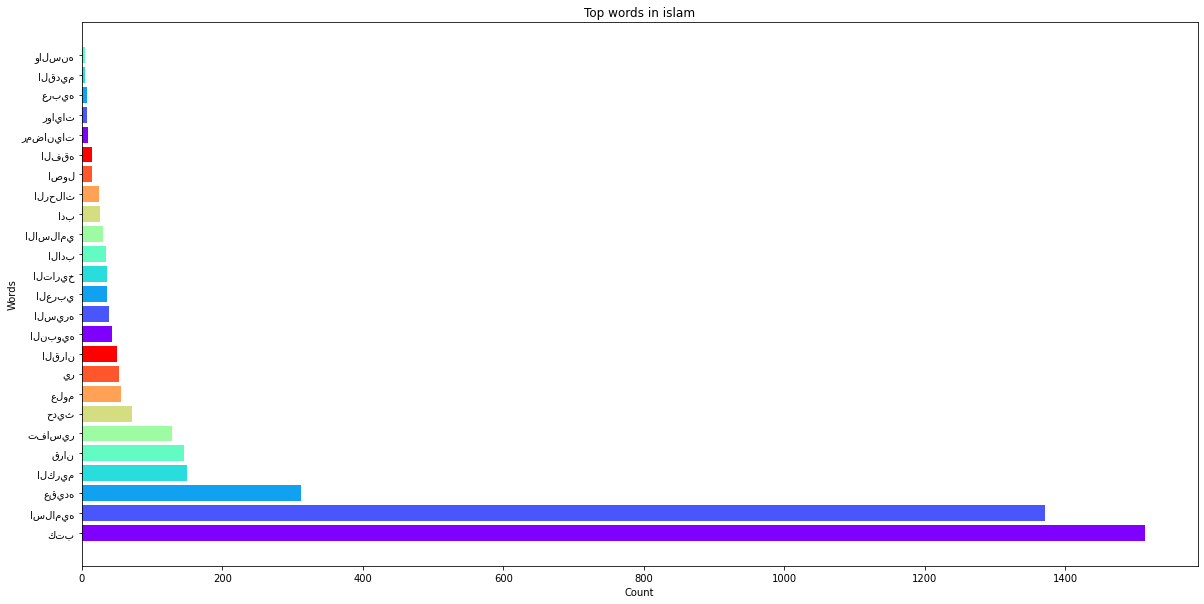

In [16]:
plot(islam_words, 'Top words in islam')


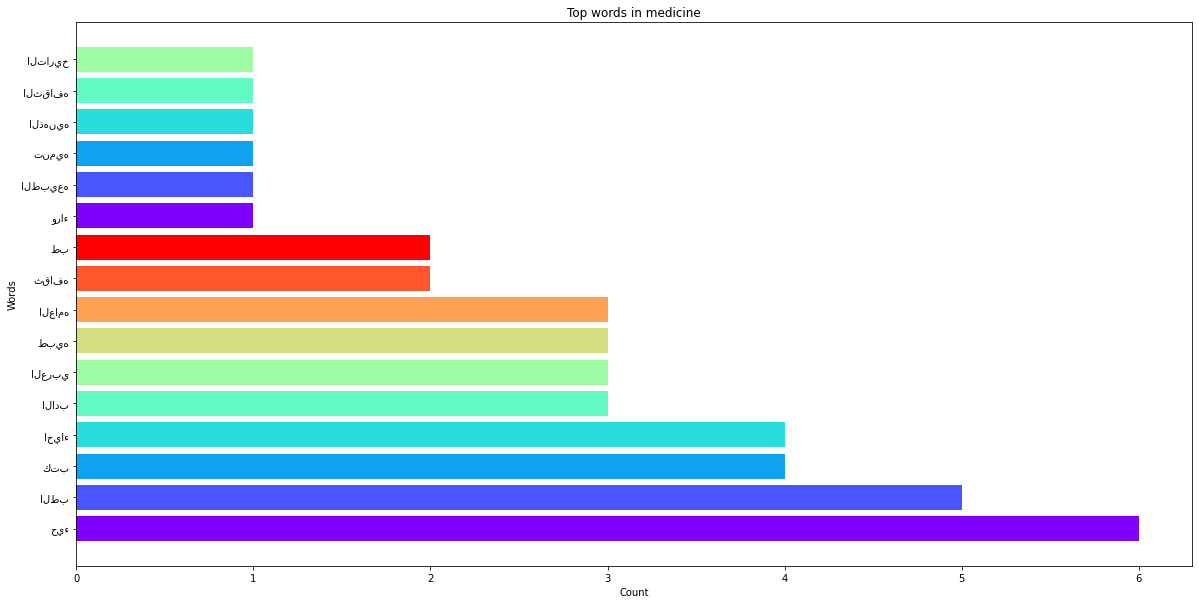

In [17]:
plot(medicine_words, 'Top words in medicine')


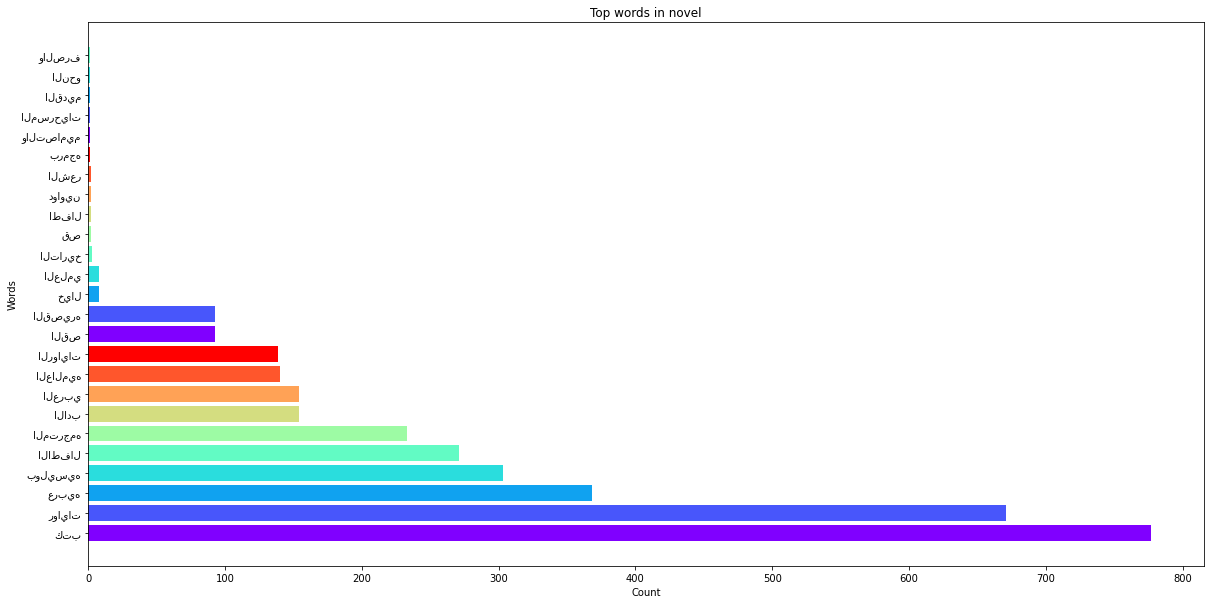

In [18]:
plot(novel_words, 'Top words in novel')


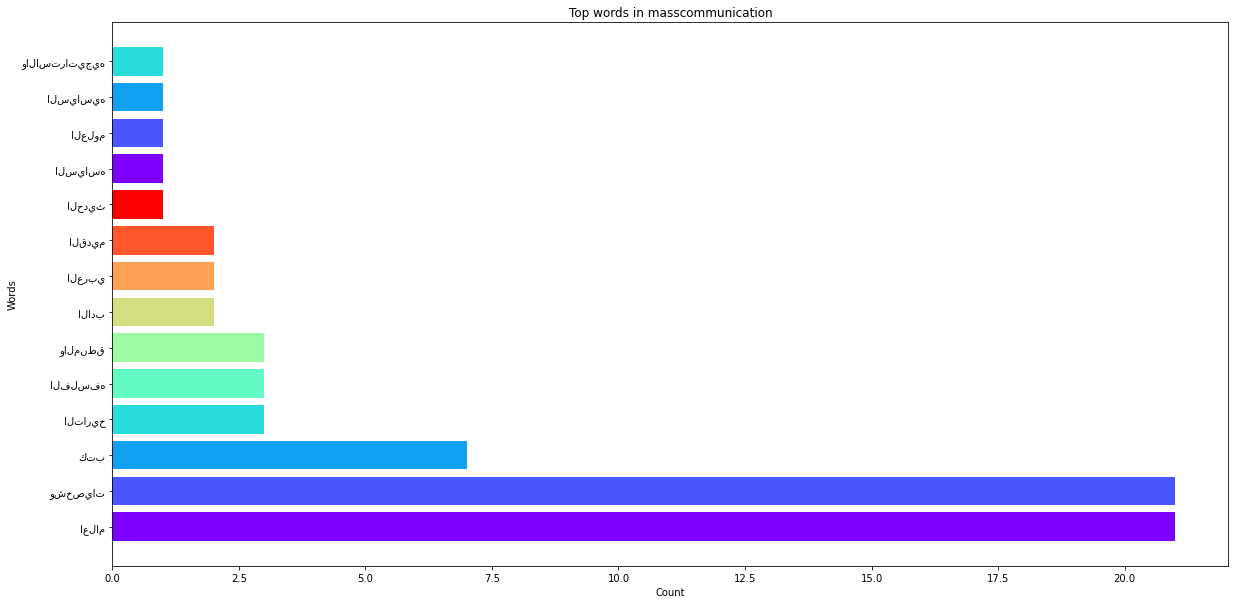

In [19]:
plot(masscomm_words, 'Top words in masscommunication')


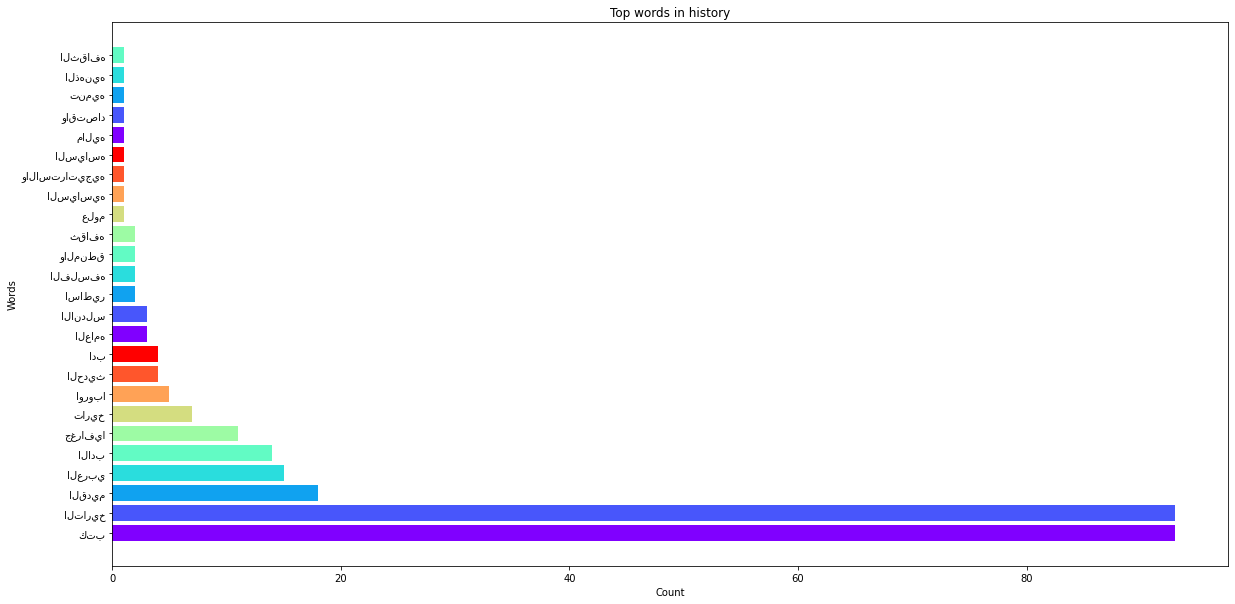

In [20]:
plot(history_words, 'Top words in history')


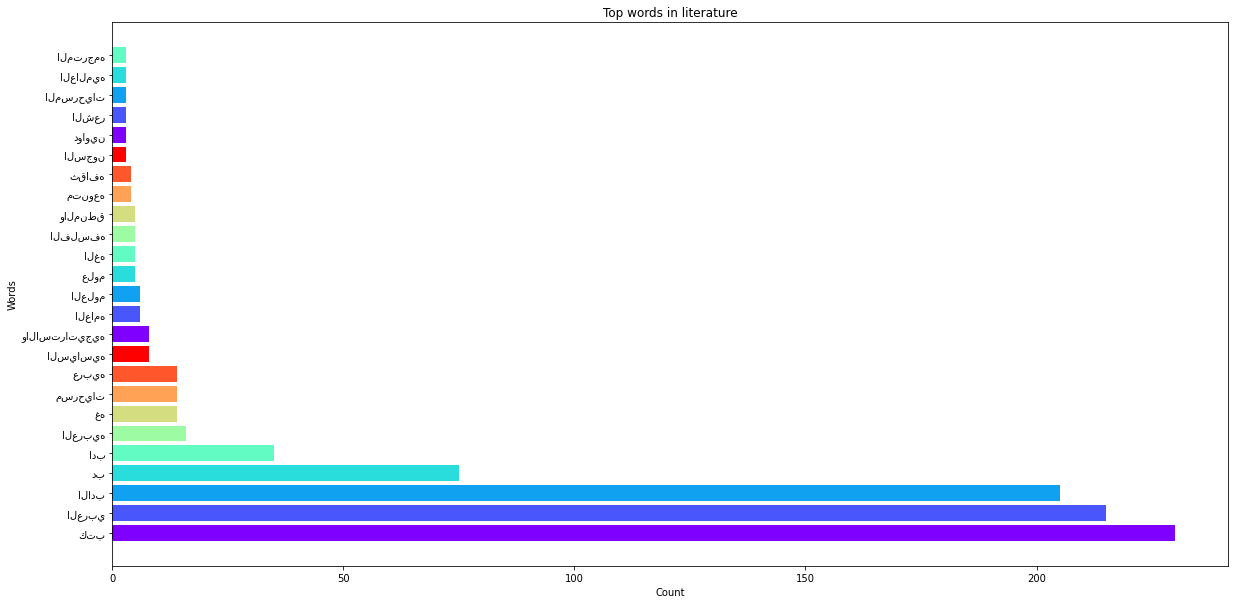

In [21]:
plot(literature_words, 'Top words in literature')


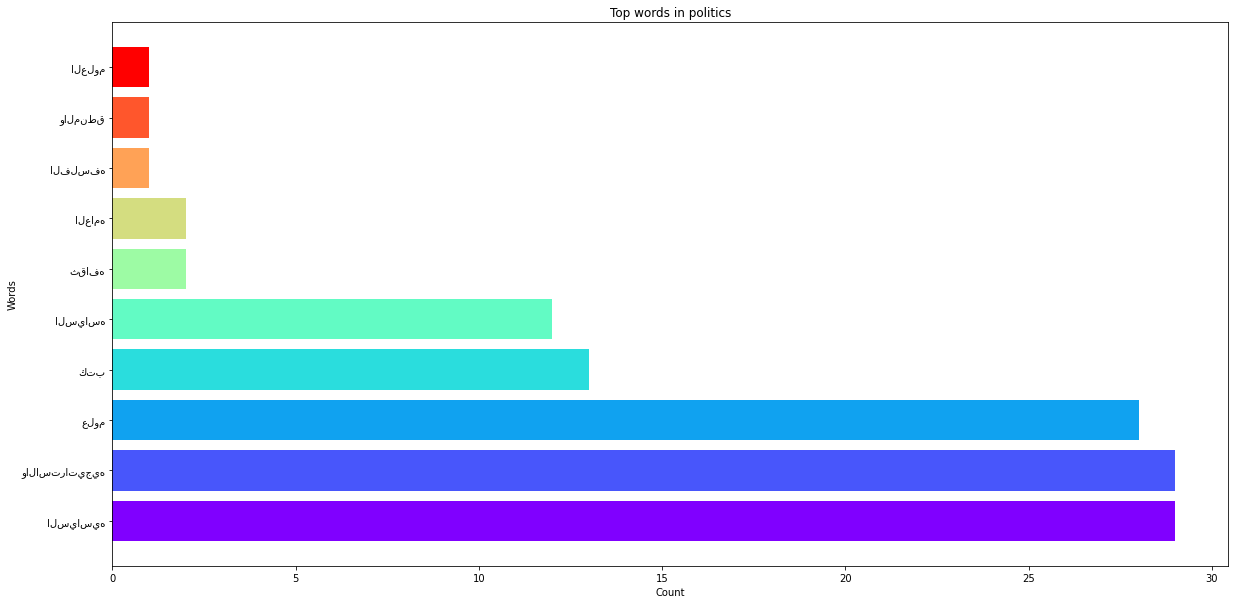

In [22]:
plot(politics_words, 'Top words in politics')


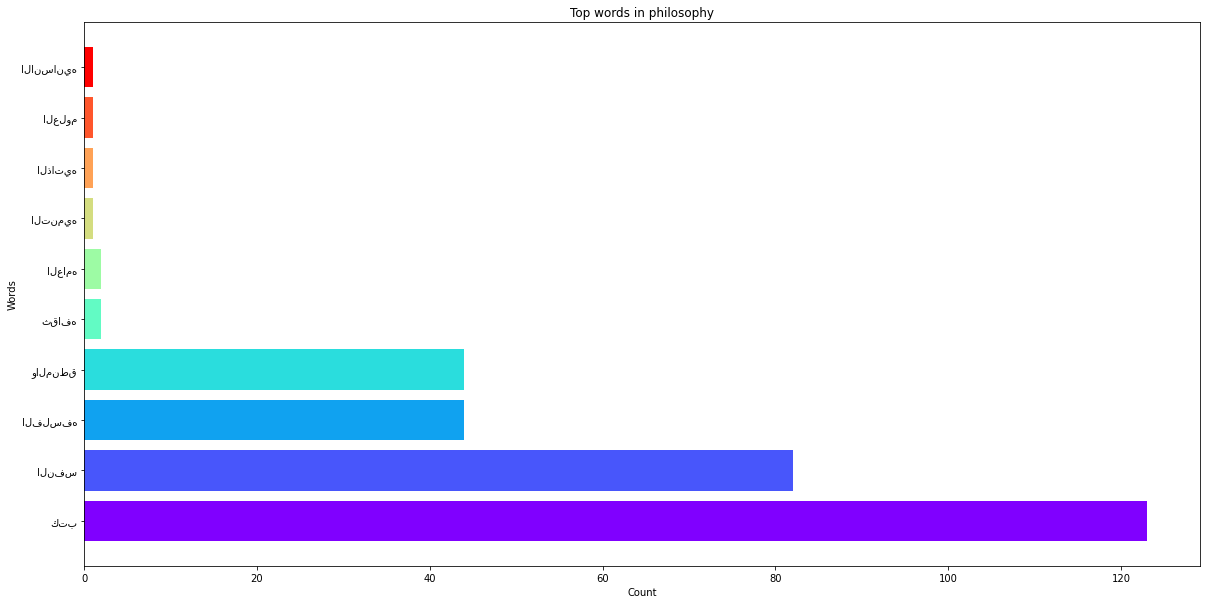

In [23]:
plot(philosophy_words, 'Top words in philosophy')


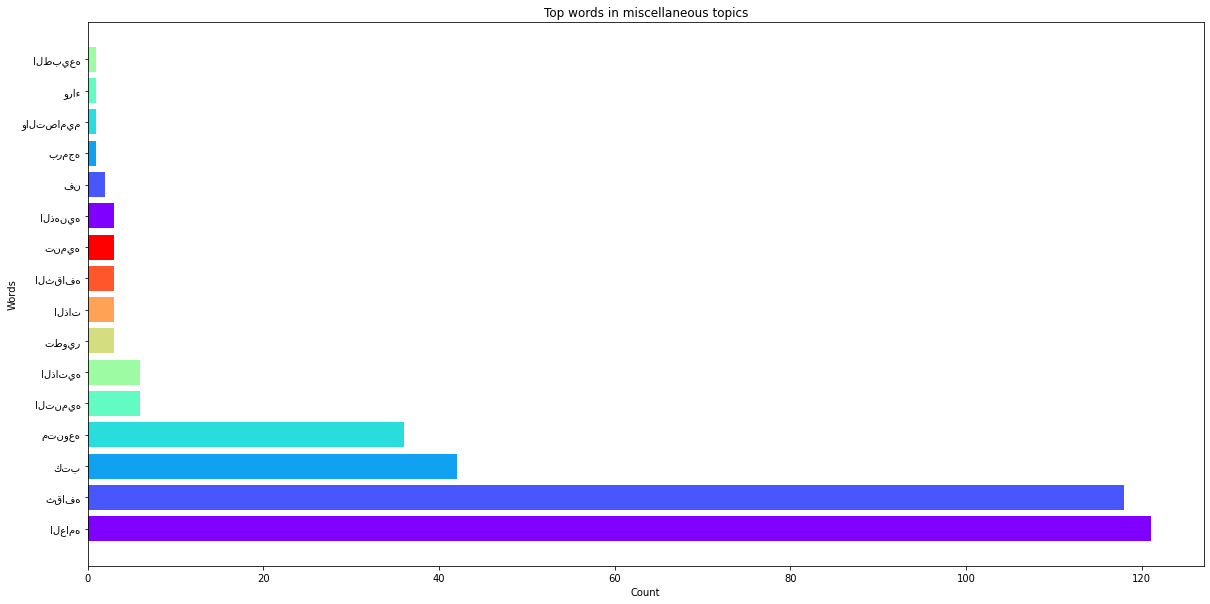

In [24]:
plot(varied_words, 'Top words in miscellaneous topics')


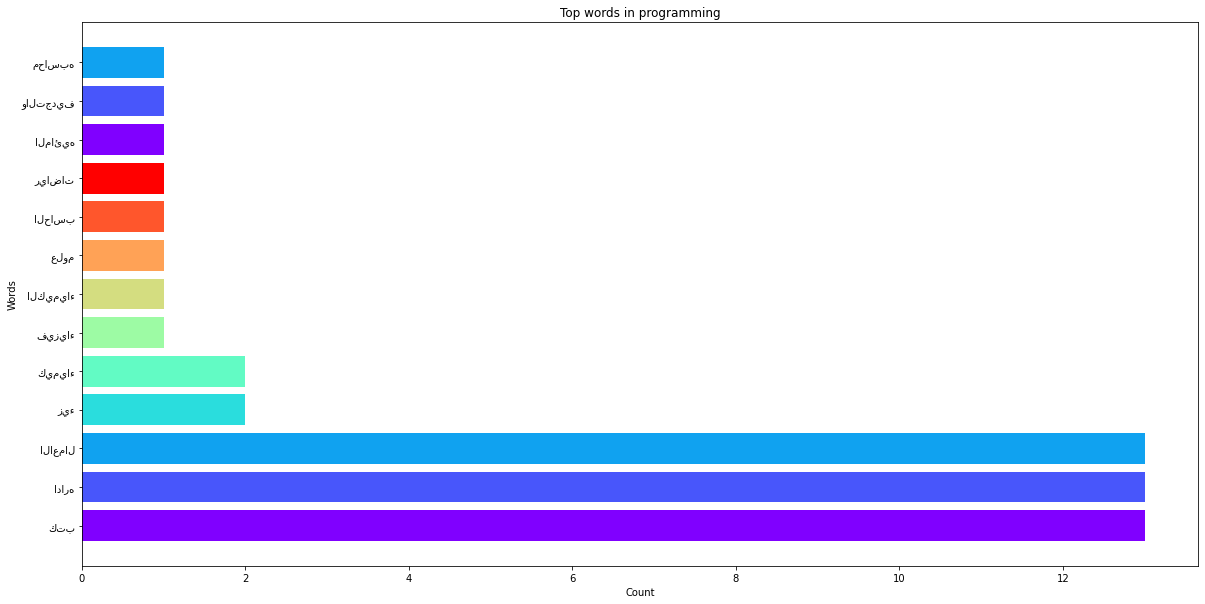

In [25]:
plot(cs_words, 'Top words in programming')


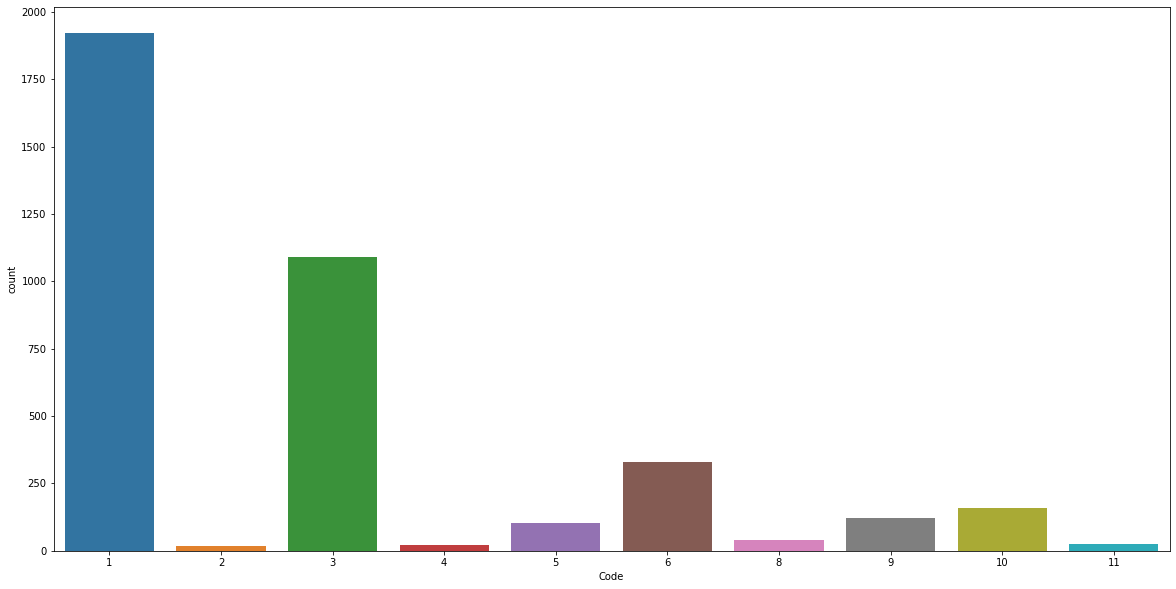

In [26]:
sns.countplot(data= clean_df, x = "Code")
plt.show()

In [27]:
y = clean_df['Code']
X = clean_df['قسم الكتاب']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

In [28]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    ngram_range=(1, 1),
    max_features =10000)

In [29]:
model = Pipeline([
                    ("tfidf", word_vectorizer), # convert words to numbers using tfidf
                    ("clf", SVC()) # model the text
])

# Fit the pipeline to the training data
model.fit(X_train.astype('str'), y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_features=10000, strip_accents='unicode',
                                 sublinear_tf=True)),
                ('clf', SVC())])

In [30]:
dump(model, "svm_model.joblib")


['svm_model.joblib']

In [31]:
def calculate_results(y_true, y_pred):
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

y_pred = model.predict(X_test.astype('str'))
result = calculate_results(y_test, y_pred)
result


{'accuracy': 98.22361546499478,
 'precision': 0.9833057817105266,
 'recall': 0.9822361546499477,
 'f1': 0.9820080192789379}

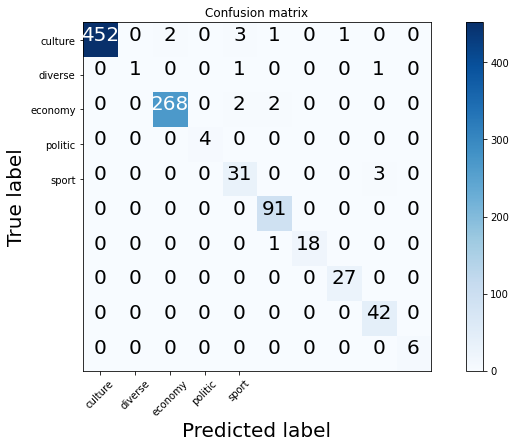

In [32]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    fig = plt.figure(figsize = (10,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 fontsize=20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=20)
    plt.xlabel('Predicted label', fontsize=20)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, ['culture', 'diverse', 'economy', 'politic', 'sport'])

In [33]:
def prepareData(df):
    remove_hashtag(df, 'قسم الكتاب')
    df["قسم الكتاب"] = df['قسم الكتاب'].apply(lambda x: processDocument(x, stemmer))
    tokenizer = RegexpTokenizer(r'\w+')
    df["قسم الكتاب"] = df["قسم الكتاب"].apply(tokenizer.tokenize)
    stopwords_list = stopwords.words('arabic')
    df["قسم الكتاب"] = df["قسم الكتاب"].apply(lambda x: [item for item in x if item not in stopwords_list])
    return df

prepared_df = prepareData(df)
prepared_df

,موقع الكتاب,اسم الكتاب,مولف الكتاب,قسم الكتاب,Code,اللغه,عدد صفحات الكتاب,دار النشر,حجم الكتاب,صيغه الكتاب
0,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز المنزل رقم 98,محمود سالم,"[روايات, بوليسيه]",3,عربي,48 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
1,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الموسيقار الصغير,محمود سالم,"[روايات, بوليسيه]",3,عربي,54 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
2,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب لغز الوثائق السرية,محمود سالم,"[روايات, بوليسيه]",3,عربي,50 صفحة,مؤسسة هنداوي,2 ميغابايت,pdf
3,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب التضحية عند الحيوان,هارون يحيى,"[كتب, الادب, العربي, متنوعه]",6,عربي,160 صفحة,عدنان أوكطار,5 ميغابايت,pdf
4,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب معجزة الذرة,هارون يحيى,"[كتب, تطوير, الذات, متنوعه]",10,عربي,136 صفحة,عدنان أوكطار,3.41 ميغابايت,pdf
...,...,...,...,...,...,...,...,...,...,...
3962,https://www.arab-books.com/books/%d8%b1%d9%88%...,رواية قصة لا تنتهي,NaN,[],3,العربية,122 صفحة,العربية الحديثة,4.5 ميغابايت,PDF
3963,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب صلاة أهل الأعذار,NaN,[],1,العربية,7 صفحة,العثيمين الخيرية,بايت ميغابايت,PDF
3964,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب أذكار الصباح والمساء,NaN,[],1,العربية,33 صفحة,النشر: العقيدة,1.05 ميغابايت,PDF
3965,https://www.arab-books.com/books/%d9%83%d8%aa%...,كتاب يوميات نص الليل PDF لمصطفى مح,NaN,[],3,العربية,57 صفحة,النشر: المعارف,5 ميغابايت,PDF


In [34]:
model = load("svm_model.joblib")


[Text(-2.0, 0, ''),
 Text(0.0, 0, 'اسلاميات'),
 Text(2.0, 0, 'الطب'),
 Text(4.0, 0, 'روايات'),
 Text(6.0, 0, 'اعلام'),
 Text(8.0, 0, 'تاريخ'),
 Text(10.0, 0, 'ادب'),
 Text(12.0, 0, 'سياسه'),
 Text(14.0, 0, 'فلسفه')]

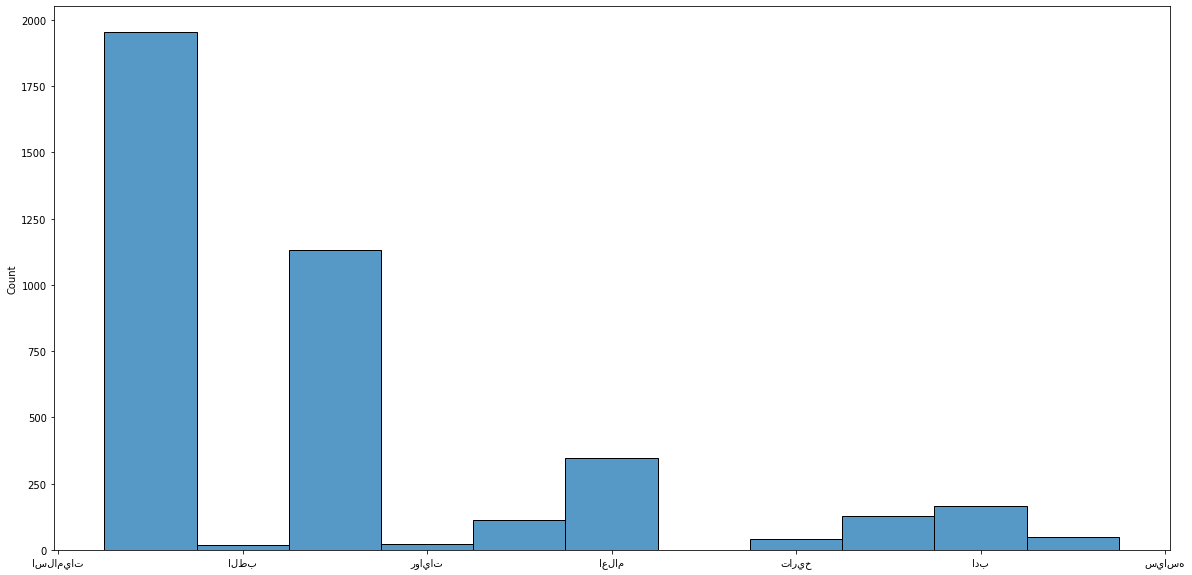

In [35]:
y_pred = model.predict(prepared_df["قسم الكتاب"].astype('str'))

ax = sns.histplot(y_pred, discrete=True)
ax.set_xticklabels(["", "اسلاميات", "الطب", "روايات", "اعلام", "تاريخ" ,"ادب" ,"سياسه" ,"فلسفه" ,"منوعات" ,"علوم حاسب" ])

In [36]:
y_islam = y_pred[y_pred == 1]
y_medicine = y_pred[y_pred == 2]
y_novel = y_pred[y_pred == 3]
y_masscomm = y_pred[y_pred == 4]
y_history = y_pred[y_pred == 5]
y_literature = y_pred[y_pred == 6]
y_politics = y_pred[y_pred == 8]
y_philosophy = y_pred[y_pred == 9]
y_varied = y_pred[y_pred == 10]
y_cs = y_pred[y_pred == 11]

In [37]:
table = {
    "label" : [ "اسلاميات", "الطب", "روايات", "اعلام", "تاريخ" ,"ادب" ,"سياسه" ,"فلسفه" ,"منوعات" ,"علوم حاسب" ],
    "count" : [len(y_islam), len(y_medicine), len(y_novel), len(y_masscomm), len(y_history), len(y_literature), len(y_politics), len(y_philosophy), len(y_varied), len(y_cs)],
    "percentage" : [(len(y_islam) / len(y_pred)) * 100,
                    (len(y_medicine) / len(y_pred)) * 100,
                    (len(y_novel) / len(y_pred)) * 100,
                    (len(y_masscomm) / len(y_pred)) * 100,
                    (len(y_history) / len(y_pred)) * 100,
                    (len(y_literature) / len(y_pred)) * 100,
                    (len(y_politics) / len(y_pred)) * 100,
                    (len(y_philosophy) / len(y_pred)) * 100,
                    (len(y_varied) / len(y_pred)) * 100,
                    (len(y_cs) / len(y_pred)) * 100]
}

stat = pd.DataFrame(table)
stat

,label,count,percentage
0,اسلاميات,1954,49.256365
1,الطب,19,0.478951
2,روايات,1133,28.560625
3,اعلام,21,0.529367
4,تاريخ,113,2.848500
5,ادب,345,8.696748
6,سياسه,41,1.033527
7,فلسفه,128,3.226620
8,منوعات,166,4.184522
9,علوم حاسب,47,1.184774


In [38]:
result = [[], [], [], [], [], [], [], [], [], []]
for i in range(2):
    for index in range(len(y_pred)):
        if y_pred[index] == 1:
            result[0].append(index)
        elif y_pred[index] == 2:
            result[1].append(index)
        elif y_pred[index] == 3:
            result[2].append(index)
        elif y_pred[index] == 4:
            result[3].append(index)
        elif y_pred[index] == 5:
            result[4].append(index)
        elif y_pred[index] == 6:
            result[5].append(index)
        elif y_pred[index] == 8:
            result[6].append(index)
        elif y_pred[index] == 9:
            result[7].append(index)
        elif y_pred[index] == 10:
            result[8].append(index)
        elif y_pred[index] == 11:
            result[9].append(index)

In [39]:
for i in range(10):
    print(table["label"][i] + " :\n" + str(df.iloc[random.choice(result[i])]["قسم الكتاب"]) + "\n\n")

اسلاميات :
['كتب', 'اسلاميه']


الطب :
['طب']


روايات :
['كتب', 'الادب', 'العربي', 'روايات', 'عربيه']


اعلام :
['اعلام', 'وشخصيات']


تاريخ :
['كتب', 'الادب', 'العربي', 'التاريخ']


ادب :
['كتب', 'الادب', 'العربي']


سياسه :
['علوم', 'السياسيه', 'والاستراتيجيه', 'كتب', 'التاريخ', 'السياسه']


فلسفه :
['كتب', 'النفس']


منوعات :
['ثقافه', 'العامه']


علوم حاسب :
['كتب', 'اداره', 'الاعمال']


